# Perceptron Algorithm

In [ ]:
# utils

import numpy as np
import matplotlib
from matplotlib import pyplot

# Some functions to plot our points and draw the lines
def plot_points(features, labels):
    X = np.array(features)
    y = np.array(labels)
    spam = X[np.argwhere(y==1)]
    ham = X[np.argwhere(y==0)]


    # 1. **[s[0][0] for s in spam]**  
    # Lista con la coordenada X de cada punto de la clase "spam".

    # 2. **[s[0][1] for s in spam]**  
    # Lista con la coordenada Y de cada punto de la clase "spam".

    # 3. **s = 100**  
    # Tamaño de los puntos (entre más grande el número, más grande el punto).

    # 4. **color = 'cyan'**  
    # Color de relleno de los puntos (en este caso, cian).

    # 5. **edgecolor = 'k'**  
    # Color del borde de los puntos (`'k'` significa negro).

    # 6. **marker = '^'**  
    # Forma del marcador, en este caso un triángulo hacia arriba.


    pyplot.scatter([s[0][0] for s in spam],
                   [s[0][1] for s in spam],
                   s = 100,
                   color = 'cyan',
                   edgecolor = 'k',
                   marker = '^')
    pyplot.scatter([s[0][0] for s in ham],
                   [s[0][1] for s in ham],
                   s = 100,
                   color = 'red',
                   edgecolor = 'k',
                   marker = 's')
    pyplot.xlabel('aack')
    pyplot.ylabel('beep')
    pyplot.legend(['happy','sad'])
    
def draw_line(a,b,c, starting=0, ending=3, **kwargs):
    # Plotting the line ax + by + c = 0
    x = np.linspace(starting, ending, 1000)
    # **kwargs => El parámetro **kwargs permite pasar argumentos adicionales y opcionales a la función draw_line.
    # Example: draw_line(a, b, c, color='green', linestyle='--', linewidth=2)
    # ax + by + c = 0  => y = -c/b - a*x/b
    pyplot.plot(x, -c/b - a*x/b, **kwargs)

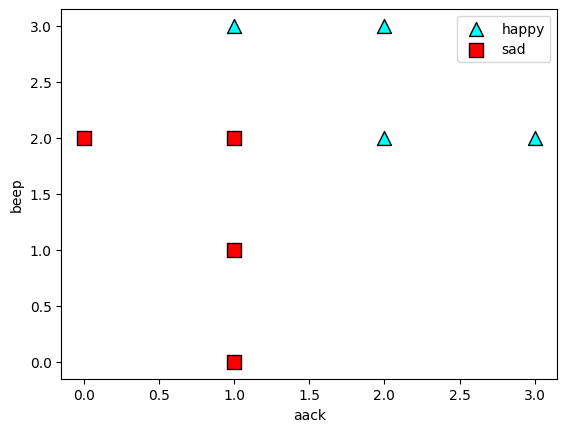

In [ ]:
# Defining and plotting our dataset

features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[2,3],[3,2]])
labels = np.array([0,0,0,0,1,1,1,1])

plot_points(features, labels)


In [4]:
def score(weights, bias, features):
    return features.dot(weights) + bias

def step(x):
    if x >= 0:
        return 1
    else:
        return 0

def prediction(weights, bias, features):
    return step(score(weights, bias, features))

def error(weights, bias, features, label):
    pred = prediction(weights, bias, features)
    if pred == label:
        return 0
    else:
        return np.abs(score(weights, bias, features))

def mean_perceptron_error(weights, bias, features, labels):
    total_error = 0
    for i in range(len(features)):
        total_error += error(weights, bias, features[i], labels[i])
    return total_error/len(features)

In [8]:
weights = [1,2]
bias = -4
for i in range(len(features)):
    print(f"Feature: {features[i]}, Label: {labels[i]}, Prediction: {prediction(weights, bias, features[i])}, Error: {error(weights, bias, features[i], labels[i])}")

Feature: [1 0], Label: 0, Prediction: 0, Error: 0
Feature: [0 2], Label: 0, Prediction: 1, Error: 0
Feature: [1 1], Label: 0, Prediction: 0, Error: 0
Feature: [1 2], Label: 0, Prediction: 1, Error: 1
Feature: [1 3], Label: 1, Prediction: 1, Error: 0
Feature: [2 2], Label: 1, Prediction: 1, Error: 0
Feature: [2 3], Label: 1, Prediction: 1, Error: 0
Feature: [3 2], Label: 1, Prediction: 1, Error: 0


In [11]:
# First perceptron trick
def perceptron_trick(weights, bias, features, label, learning_rate = 0.01):
    pred = prediction(weights, bias, features)
    if pred == label:
        return weights, bias
    else:
        if label==1 and pred==0:
            for i in range(len(weights)):
                weights[i] += features[i]*learning_rate
            bias += learning_rate
        elif label==0 and pred==1:
            for i in range(len(weights)):
                weights[i] -= features[i]*learning_rate
            bias -= learning_rate
    return weights, bias


# Shorter version of the perceptron trick
def perceptron_trick(weights, bias, features, label, learning_rate = 0.01):
    pred = prediction(weights, bias, features)
    for i in range(len(weights)):
        weights[i] += (label-pred)*features[i]*learning_rate
    bias += (label-pred)*learning_rate
    return weights, bias


perceptron_trick(weights, bias, features[6], 0)


([np.float64(0.98), np.float64(1.97)], -4.01)

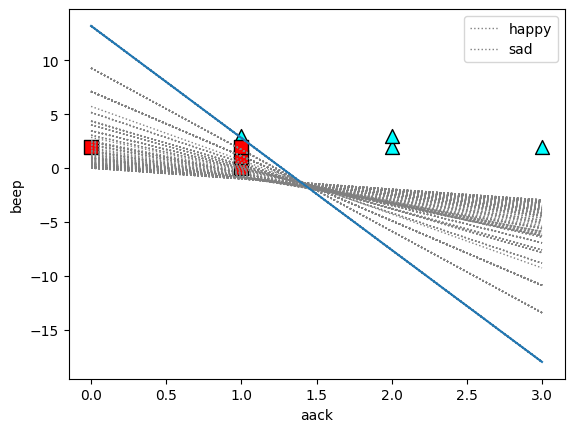

([np.float64(0.5199999999999996), np.float64(0.049999999999999364)],
 np.float64(-0.6600000000000004))

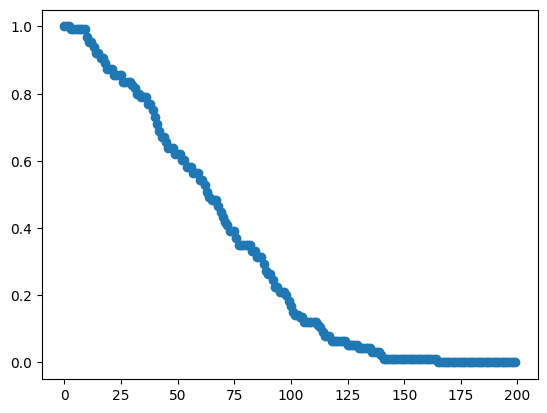

In [13]:
# Perceptron algorithm

import random
import matplotlib.pyplot as plt

random.seed(0)
def perceptron_algorithm(features, labels, learning_rate = 0.01, epochs = 200):
    weights = [1.0 for i in range(len(features[0]))]
    bias = 0.0
    errors = []
    for epoch in range(epochs):
        # Coment the following line to draw only the final classifier
        draw_line(weights[0], weights[1], bias, color='grey', linewidth=1.0, linestyle='dotted')
        error = mean_perceptron_error(weights, bias, features, labels)
        errors.append(error)
        i = random.randint(0, len(features)-1)
        weights, bias = perceptron_trick(weights, bias, features[i], labels[i])
    draw_line(weights[0], weights[1], bias)
    plot_points(features, labels)
    plt.show()
    plt.scatter(range(epochs), errors)
    return weights, bias

perceptron_algorithm(features, labels)
